# Day 25 according to Remi

## De-coupling ODEs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
def graph(x, y, xname = "x-axis", yname = "y-axis"):
    fig0, ax0 = plt.subplots(figsize=(10,10))

    ax0.plot(x, y)
    ax0.set_xlabel(xname)
    ax0.set_ylabel(yname)

In [19]:
def f(r,t):
    x = r[0]
    y = r[1]
    fx = x*y-x
    fy = y-x*y+np.sin(t)**2
    return np.array([fx, fy], float)

In [20]:
# Rung-Kutta Fourth Order ODE
#     (f=function, a=start, b=end, x=init-condition, N=points-between-a-and-b)
def rungaFourth(f, a=0.0, b=10.0, x=0.0, N=1000):
    dt = (b-a)/N

    tpoints = np.arange(a,b,dt)
    xpoints = []

    for t in tpoints:
        xpoints.append(x)
        k1 = dt*f(x,t)
        k2 = dt*f(x+0.5*k1, t+0.5*dt)
        k3 = dt*f(x+0.5*k2, t+0.5*dt)
        k4 = dt*f(x+0.5*k3, t+0.5*dt)
        x = x + k4
    
    return tpoints, xpoints

In [30]:
# Rung-Kutta Fourth Order ODE
#     (f=function, a=start, b=end, x=init-condition, N=points-between-a-and-b)
def rungaFourthR(f, a=0.0, b=10.0, x=0.0, N=1000):
    dt = (b-a)/N
    
    r = np.array([1,1], float)

    tpoints = np.arange(a,b,dt)
    xpoints = []
    ypoints = []

    for t in tpoints:
        xpoints.append(r[0])
        ypoints.append(r[1])
        k1 = dt*f(r,t)
        k2 = dt*f(r+0.5*k1, t+0.5*dt)
        k3 = dt*f(r+0.5*k2, t+0.5*dt)
        k4 = dt*f(r+0.5*k3, t+0.5*dt)
        r = r + (k1+2*k2+2*k3+k4)/6
    
    return tpoints, xpoints, ypoints

Text(0, 0.5, 'x and y')

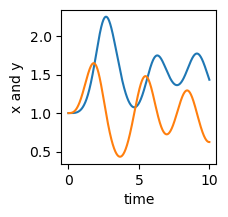

In [41]:
t,x,y = rungaFourthR(f)

fig0, ax0 = plt.subplots(figsize=(2,2))

ax0.plot(t, x)
ax0.plot(t, y)
ax0.set_xlabel('time')
ax0.set_ylabel('x and y')

## Non-linear pendulum motion

d^2(theta)\
\--------\
  d^2t
  
= -g/l * sin(theta)

d(theta) / dt = w [angular velocity]

d/dt (d(theta)/dt) = dw/dt = -g/l * sin(theta)



if theta = x, omega = y

then dx/dt = y

and dy/dt = -

In [44]:
def pendulum(r,t):
    x = r[0]
    y = r[1]
    fx = y
    fy = 9.81/1*np.sin(x)
    return np.array([fx, fy], float)

Text(0, 0.5, 'theta')

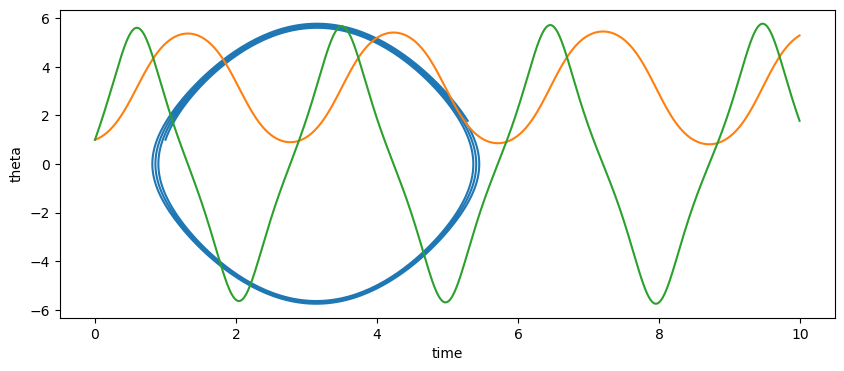

In [54]:
pt,px,py = rungaFourthR(pendulum, 0, 10)

fig0, ax0 = plt.subplots(figsize=(10,4))

ax0.plot(px,py)
ax0.plot(pt,px)
ax0.plot(pt,py) # lol
ax0.set_xlabel('time')
ax0.set_ylabel('theta')

In [50]:
## Homework problem 8.2, 8.3, [8.4, 8.5, 8.6]